In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_day1ex = pd.read_csv("day1.example",sep='  ',header=None)

C:\Users\Aurin\AppData\Local\Temp\ipykernel_7332\3341709266.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_day1ex = pd.read_csv("day1.example",sep='  ',header=None)


In [3]:
df_day1ex.head()

,0,1
0,3,4
1,4,3
2,2,5
3,1,3
4,3,9


In [4]:
np.sort(df_day1ex[0].to_numpy())


array([1, 2, 3, 3, 3, 4])

In [5]:
df_day1ex=(df_day1ex
 .assign(left_sort=np.sort(df_day1ex[0].to_numpy()))
 .assign(right_sort=np.sort(df_day1ex[1].to_numpy()))
 .assign(distance=lambda x: abs(x.left_sort - x.right_sort))
)

In [6]:
df_day1 = pd.read_csv("day1.input",sep='  ',header=None)

C:\Users\Aurin\AppData\Local\Temp\ipykernel_7332\2726429340.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_day1 = pd.read_csv("day1.input",sep='  ',header=None)


In [7]:
df_day1=(df_day1
 .assign(left_sort=np.sort(df_day1[0].to_numpy()))
 .assign(right_sort=np.sort(df_day1[1].to_numpy()))
 .assign(distance=lambda x: abs(x.left_sort - x.right_sort))
)


In [8]:
df_day1.sum()

0             54718197
1             54182401
left_sort     54718197
right_sort    54182401
distance       1197984
dtype: int64

# PART 2

In [9]:
(df_day1ex
 .assign(left_count=lambda x: sum([i for i in x.left_sort if i in x.right_sort]))
)


,0,1,left_sort,right_sort,distance,left_count
0,3,4,1,3,2,16
1,4,3,2,3,1,16
2,2,5,3,3,0,16
3,1,3,3,4,1,16
4,3,9,3,5,2,16
5,3,3,4,9,5,16


In [10]:
df_day1ex.left_sort.value_counts().to_dict()

{3: 3, 1: 1, 2: 1, 4: 1}

In [11]:
df_day1ex.right_sort.value_counts().to_dict()

{3: 3, 4: 1, 5: 1, 9: 1}

In [12]:
(df_day1ex
 .assign(ltr_count= lambda x: x.left_sort.map(x.right_sort.value_counts().to_dict()))
 .assign(rtl_count= lambda x: x.right_sort.map(x.left_sort.value_counts().to_dict()))
 .assign(right_score= lambda x: x.right_sort * x.rtl_count)
 .assign(left_score = lambda x: x.left_sort * x.ltr_count)
)

,0,1,left_sort,right_sort,distance,ltr_count,rtl_count,right_score,left_score
0,3,4,1,3,2,NaN,3.0,9.0,NaN
1,4,3,2,3,1,NaN,3.0,9.0,NaN
2,2,5,3,3,0,3.0,3.0,9.0,9.0
3,1,3,3,4,1,3.0,1.0,4.0,9.0
4,3,9,3,5,2,3.0,NaN,NaN,9.0
5,3,3,4,9,5,1.0,NaN,NaN,4.0


In [13]:
(df_day1
 .assign(ltr_count= lambda x: x.left_sort.map(x.right_sort.value_counts().to_dict()))
 .assign(rtl_count= lambda x: x.right_sort.map(x.left_sort.value_counts().to_dict()))
 .assign(right_score= lambda x: x.right_sort * x.rtl_count)
 .assign(left_score = lambda x: x.left_sort * x.ltr_count)
).sum()

0              54718197.0
1              54182401.0
left_sort      54718197.0
right_sort     54182401.0
distance        1197984.0
ltr_count           457.0
rtl_count           457.0
right_score    23387399.0
left_score     23387399.0
dtype: float64

<Axes: ylabel='Count'>

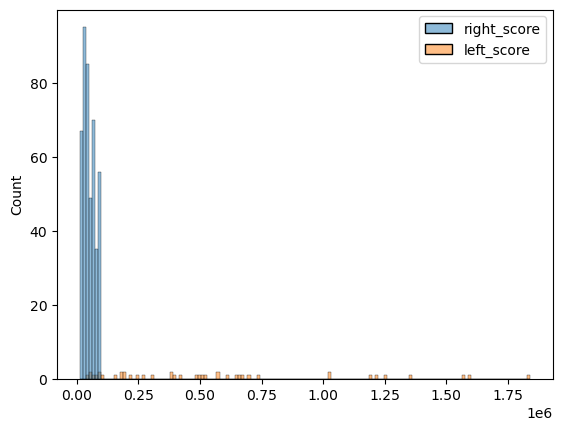

In [27]:
sns.histplot(df_day1
 .assign(ltr_count= lambda x: x.left_sort.map(x.right_sort.value_counts().to_dict()))
 .assign(rtl_count= lambda x: x.right_sort.map(x.left_sort.value_counts().to_dict()))
 .assign(right_score= lambda x: x.right_sort * x.rtl_count)
 .assign(left_score = lambda x: x.left_sort * x.ltr_count)
 [['right_score','left_score']]
)